# Тема 31. Задание проекта по распознаванию типа одежды по фотографии на Keras




# Задание
В этом задании вы должны создать и обучить нейронную сеть отличать типы одежды по их изображениям. Используйте все знания предыдущих уроков. Требуется получить не менее 80% правильных распознаваний (accuracy по тестовым данным). Пробуйте разные слои, их параметры, но нельзя заменять данные на другие.

Разбейтесь на группы и попробуйте победить соперника по точности accuracy. Представьте ваши решения, сравните с базовым. Объясните почему вы выбрали именно такую структуру нейронной сети.

Для корректности давайте ограничимся максимум 5 эпохами (учитель может назвать другое число), функция ошибки - кроссэнтропия, метрика - accuracy, нельзя менять данные.

Все остальное: слои в сети, их параметры, методы обучения и их параметры, можете менять по своему усмотрению.

Вперед к победе!

## Подключение
Сначала подключим все необходимые библиотеки, numpy, keras из tensorflow и слои layers из него. Не пугайтесь предупреждений Warning, они ничего не испортят.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Загрузка и подготовка данных
Сначала нужно загрузить и подготовить все необходимые данные. Мы уже нашли подходящие - примеры изображений предметов одежды, 10 категорий, серые, размером (28, 28, 1). Загрузим их командой `keras.datasets.fashion_mnist.load_data()` 

In [ ]:
# Гиперпараметры модели
num_classes = 10 # число классов - 
input_shape = (28, 28, 1) # размер изображений, они не цветные, поэтому канал 1.

# загружаем данные (изображения и их классы), отдельно обучающие и тестовые
(x_train, y_train_cat), (x_test, y_test_cat) = keras.datasets.fashion_mnist.load_data()
 #

4423680/4422102 [==============================] - 0s 0us/step


Изображения - массивы целых чисел от 0 до 255, для обучения их нужно перевести в числа с плавающей точкой (float) в диапазон [0 , 1]


In [ ]:
# Преобразуем во float и диапазон [0, 1]
x_train = x_train.astype("float32") / 255 #
x_test = x_test.astype("float32") / 255 #
# на всякий случай принудительно сделаем размер (28, 28, 1)
x_train = np.expand_dims(x_train, -1) # для обучающих
x_test = np.expand_dims(x_test, -1) # для тестовых
print("x_train shape:", x_train.shape) # размер массива
print(x_train.shape[0], "train samples") # число примеров обучения
print(x_test.shape[0], "test samples") # число примеров теста

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


В нашем примере 10 классов, значит надо использовать 10-мерные вектора для кодирования классов. Для этого есть вспомогательная функция `keras.utils.to_categorical`

In [ ]:
# переводим метки классов в бинарные вектора 
y_train = keras.utils.to_categorical(y_train_cat, num_classes) # обучающие
y_test = keras.utils.to_categorical(y_test_cat, num_classes) # тестовые

Сделаем функцию для отображения фотографии и подписи ее класса. Порядок классов предопределен при создании.

In [ ]:
from matplotlib import pyplot as plt  # 
def plotMatrixWithLabel(data,label):
    cat_names=('0.Футболка','1.Брюки','2.Свитер','3.Платье','4.Пальто',
               '5.Сандаль','6.Рубашка','7.Ботинок','8.Сумка','9.Сапог')
    plt.imshow(data[:,:,0],cmap="gray")# 
    plt.title(cat_names[label])#

    

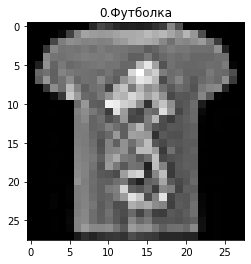

In [ ]:
ind=np.random.randint(60000)# случайный пример
plotMatrixWithLabel(x_train[ind],y_train_cat[ind])# рисуем его

## Создание нейронной сети
Надо указать какие слои есть в нейронной сети и параметры этих слоев, если нужны.
Мы строим простую сеть, в которой слои будут идти последовательно, для чего используется контейнер `keras.Sequential()`. Указывайте здесь свои слои, следите за размерами выходов слоев.

In [ ]:
# задаем последовательную модель
model = keras.Sequential( # слои перечисляются ниже
    [
        # ВАШ КОД ЗДЕСЬ, различные слои, различные параметры их. 
        
        # последний полносвязный слой, размер его равен числу классов, функция активации softmax
        layers.Dense(num_classes, activation="softmax"), #
    ]
)

Посмотрим на созданную сеть, особенно обратите внимание на размерности массивов выхода и число обучающих параметров в слое (первый None относится к числу обучающих примеров, вход  не показан, функции активации не показаны).

In [ ]:
model.summary() # информация о созданной сети

## Обучение сети
Сеть создана, теперь ее надо обучить. 

Необходимо указать какая используется функция ошибки, метод обучения и его параметры, метрика для проверки. 

Для задания параметров обучения используем метод `.compile()`.

Для обучения - метод `.fit()`. Здесь часть данных может быть использована для проверки (validation) работы сети, чтобы в случае если вдруг ошибка обобщения начала увеличиваться, то остановить процесс и не испортить уже достигнутой точности.

О возможных вариантах слоев, функций ошибки, методов обучения и метрик смотри [справку](https://keras.io/api/). 

In [ ]:
batch_size = # ВАШ КОД ЗДЕСЬ # размер пакета (batch)
epochs = 5 # количество эпох обучения. НЕ МЕНЯЙТЕ

# задаем функцию ошибки, метод обучения и метрику проверки
model.compile(
    loss="categorical_crossentropy", # кросс-энтропия, одна из возможных функций ошибки, часто используется для классификации
    optimizer=# ВАШ КОД ЗДЕСЬ # метод обучения 
    metrics=["accuracy"]) # метрика accuracy
# запускаем обучение
model.fit(
    # ВАШ КОД ЗДЕСЬ
    epochs=epochs, # максимальное число эпох обучения
    validation_split=0.1) # доля данных, отданных на проверку

## Проверка работы модели
Обучив сеть, давайте для тестовых данных, на которых мы не обучались, определим их классы и сравним с настоящими. Для этого используется метод `.evaluate()`

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0) # оцениваем нашу модель (verbose=0 подавляет вывод на экран)
print("Test loss:", score[0]) # функция ошибки на тестовых данных
print("Test accuracy:", score[1]) # метрика (из заданных, у нас accuracy) на тестовых данных


Все обучилось?

Давайте построим несколько картинок.

Чтобы рассчитать выход обученной сети по известному входу используем метод `.predict()`.
Он вернет нам вектор выхода. 

Если нам нужен номер класса, а не его вектор, то можно использовать метод `.predict_classes()`, но осторожно, эта функция почему-то не документирована.   

In [ ]:
test_example=np.random.randint(10000)# случайный пример
# индекс примера
test_input=x_test[test_example:test_example+1] # изображение этого примера
#test_output=model.predict(test_input)#
test_output=model.predict_classes(test_input)# распознанный класс для него
plotMatrixWithLabel(test_input[0],test_output[0])# рисуем его


Дополнительно: Найдите и покажите на экране тестовые примеры, которые распознались неверно.

In [ ]:
# ВАШ КОД ЗДЕСЬ